## Feature Engineering
Script Name: feature_exploration.ipynb

Author: Brian Cain


The purpose of this notebook is to use the cleaned data from the Data Wrangling process and create features necessary/useful in bayesian predictive modeling. These features will also be analyzed for elements such as collinearity which will effect model making decisions. The product of this notebook will be a finalized dataframe used for predictive modeling. All functions resulting from this notebook can be found in feature_creation.ipynb. 

<hr>

In [1]:
##Import necessary packages
import pandas as pd
import numpy as np

##Pull in and display the data from the finalized data wrangling process
data = pd.read_csv('D:\\College_Football_Model_Data\\cleanData.csv')
print('Data from Data Wrangling Process:')
data.head(5)

Data from Data Wrangling Process:


,gameId,school,week_num,gameSeason,homeBool,win,rush_td_movAvg,pass_td_movAvg,rush_attempt_movAvg,yp_rush_movAvg,...,gameControl_movAvg,completion_pct_movAvg,opp_completion_pct_movAvg,third_pct_movAvg,opp_third_pct_movAvg,fourth_pct_movAvg,opp_fourth_pct_movAvg,diff_points_movAvg,games_played,games_won
0,400764869,Temple,3,2015.0,1,1.0,1.666667,1.000000,38.666667,3.766667,...,2.250000,0.661111,0.514732,0.405811,0.322227,0.166667,0.333333,9.000000,3,3.0
1,400763604,UTEP,3,2015.0,1,1.0,1.666667,1.333333,41.000000,4.300000,...,-7.000000,0.695013,0.582540,0.433333,0.405594,0.333333,0.833333,-27.000000,3,1.0
2,400756922,Georgia Tech,3,2015.0,1,0.0,3.500000,2.500000,51.500000,6.200000,...,5.875000,0.566667,0.577273,0.433333,0.381818,0.833333,0.250000,23.500000,2,1.0
3,400603852,South Carolina,3,2015.0,1,0.0,1.333333,0.666667,40.000000,5.200000,...,-2.666667,0.509540,0.765680,0.317460,0.306777,0.666667,0.500000,-10.666667,3,1.0
4,400603853,Kentucky,3,2015.0,1,0.0,1.666667,1.000000,35.000000,5.000000,...,0.500000,0.509353,0.618228,0.325397,0.250080,0.888889,0.916667,2.000000,3,2.0


Note that the cleaned data above still contains two records for each game. Each record contains a single teams data (home and away team). We need to compress each team record for a single game into a single record containing both team's data. A function to perform this task is written below: 

In [2]:
def combine_data(gameRecords,columns): ##Very similar to obtain_defensive in dataAggregation.py

    ##Split data into two dataframes [homeData, awayData]
    homeData = gameRecords.loc[gameRecords['homeBool']==1,columns]
    awayData = gameRecords.loc[gameRecords['homeBool']==0,columns]

    ##Rename the columns in these dataframes
    dfs = [homeData,awayData]
    for i in range(len(dfs)):
        for j in columns:
            if j != 'gameId' and j!= 'gameSeason':
                dfs[i] = dfs[i].rename(columns={j:'opposition_'+j})

    homeData,awayData = dfs[0],dfs[1]

    ##Now join opponent offensive data onto the cleaned data frame
    new_homeData = pd.merge(gameRecords[gameRecords['homeBool']==1],
                            awayData,
                            how='left',
                            left_on=['gameId'],
                            right_on=['gameId'])
    new_awayData = pd.merge(gameRecords[gameRecords['homeBool']==0],
                            homeData,
                            how='left',
                            left_on=['gameId'],
                            right_on=['gameId'])

    ##Stack the two dataframe for our end result
    new_gameRecords_df = pd.concat([new_homeData,new_awayData])

    return new_gameRecords_df

##Conduct operation so we have all game data for both teams in a single row
cols_for_combination = ['gameId', 'homeBool', 'win',
       'rush_td_movAvg', 'pass_td_movAvg', 'rush_attempt_movAvg',
       'yp_rush_movAvg', 'rush_yards_movAvg', 'yp_pass_movAvg',
       'pass_yards_movAvg', 'total_yards_movAvg', 'turnovers_movAvg',
       'fumbles_lost_movAvg', 'interceptions_movAvg', 'firstDowns_movAvg',
       'defensive_td_movAvg', 'points_movAvg', 'elo_movAvg',
       'offensive_drives_movAvg', 'offensive_ppa_movAvg',
       'offensive_successRate_movAvg', 'offensive_explosiveness_movAvg',
       'offensive_powerSuccess_movAvg', 'offensive_stuffRate_movAvg',
       'offensive_lineYards_movAvg', 'offensive_secondLevelYards_movAvg',
       'passComplete_movAvg', 'passAttempt_movAvg', 'fourthSuccess_movAvg',
       'fourthAttempts_movAvg', 'thirdSuccess_movAvg', 'thirdAttempts_movAvg',
       'quarters_available_movAvg', 'Q1_points_movAvg', 'Q2_points_movAvg',
       'Q3_points_movAvg', 'Q4_points_movAvg', 'opp_rush_td_movAvg',
       'opp_pass_td_movAvg', 'opp_rush_attempt_movAvg', 'opp_yp_rush_movAvg',
       'opp_rush_yards_movAvg', 'opp_yp_pass_movAvg', 'opp_pass_yards_movAvg',
       'opp_total_yards_movAvg', 'opp_turnovers_movAvg',
       'opp_fumbles_lost_movAvg', 'opp_interceptions_movAvg',
       'opp_firstDowns_movAvg', 'opp_defensive_td_movAvg',
       'opp_points_movAvg', 'opp_elo_movAvg', 'opp_offensive_drives_movAvg',
       'opp_offensive_ppa_movAvg', 'opp_offensive_successRate_movAvg',
       'opp_offensive_explosiveness_movAvg',
       'opp_offensive_powerSuccess_movAvg', 'opp_offensive_stuffRate_movAvg',
       'opp_offensive_lineYards_movAvg',
       'opp_offensive_secondLevelYards_movAvg', 'opp_passComplete_movAvg',
       'opp_passAttempt_movAvg', 'opp_fourthSuccess_movAvg',
       'opp_fourthAttempts_movAvg', 'opp_thirdSuccess_movAvg',
       'opp_thirdAttempts_movAvg',
       'opp_Q1_points_movAvg', 'opp_Q2_points_movAvg', 'opp_Q3_points_movAvg',
       'opp_Q4_points_movAvg', 'gameControl_movAvg', 'completion_pct_movAvg',
       'opp_completion_pct_movAvg', 'third_pct_movAvg', 'opp_third_pct_movAvg',
       'fourth_pct_movAvg', 'opp_fourth_pct_movAvg', 'diff_points_movAvg',
       'games_played', 'games_won']

##Call function to combine game data
data = combine_data(data,cols_for_combination)
data.head()

,gameId,school,week_num,gameSeason,homeBool,win,rush_td_movAvg,pass_td_movAvg,rush_attempt_movAvg,yp_rush_movAvg,...,opposition_gameControl_movAvg,opposition_completion_pct_movAvg,opposition_opp_completion_pct_movAvg,opposition_third_pct_movAvg,opposition_opp_third_pct_movAvg,opposition_fourth_pct_movAvg,opposition_opp_fourth_pct_movAvg,opposition_diff_points_movAvg,opposition_games_played,opposition_games_won
0,400764869,Temple,3,2015.0,1,1.0,1.666667,1.000000,38.666667,3.766667,...,-4.500000,0.549351,0.598214,0.275735,0.510526,0.500000,0.250000,-18.000000,2,0.0
1,400763604,UTEP,3,2015.0,1,1.0,1.666667,1.333333,41.000000,4.300000,...,-4.166667,0.526959,0.765090,0.255342,0.544444,0.388889,0.666667,-17.666667,3,0.0
2,400756922,Georgia Tech,3,2015.0,1,0.0,3.500000,2.500000,51.500000,6.200000,...,4.166667,0.675362,0.455123,0.311688,0.247619,0.555556,0.722222,16.666667,3,3.0
3,400603852,South Carolina,3,2015.0,1,0.0,1.333333,0.666667,40.000000,5.200000,...,7.166667,0.731429,0.575883,0.371083,0.325397,0.500000,0.583333,28.666667,3,3.0
4,400603853,Kentucky,3,2015.0,1,0.0,1.666667,1.000000,35.000000,5.000000,...,5.000000,0.668900,0.496169,0.385392,0.297619,1.000000,0.611111,20.000000,3,3.0


<b>Important Modeling Decision:</b>

A choice must be made to either model the odds the home team or away team wins. A single model for both scenarios would introduce inconsistencies in game prediction probabilities. I choose to model the probability the home team will win the game, so the dataset is modified to reflect that. 

In [3]:
##Filter data to only be home games
data = data[data['homeBool']==1]

In [4]:
##Inspect the win and loss class balance for home games
print('Win/Loss Class Balance of Data:')
print('Wins: '+str(len(data[data['win']==1])))
print('Losses: '+str(len(data[data['win']==0])))

Win/Loss Class Balance of Data:
Wins: 1701
Losses: 2101


The data for home teams is relatively balanced, with there being more losses than wins. This is an interesting result and potential evidence to de-bunk home-field advantage, however that would require a more detailed study for another time. 

### Feature Creation:

In this section we will explore what features are already in existence in the data and create new features based off of these. First lets explore the feature we have and the data-types they were loaded as.

In [5]:
##Import nice package for creating organized tables
from tabulate import tabulate

##Display current features and datatypes
colData = [['Feature','Data Type']]
for i in data.columns:
    colData.append([i,data[i].dtype])
print(tabulate(colData,headers='firstrow',tablefmt='grid'))

+--------------------------------------------------+-------------+
| Feature                                          | Data Type   |
+==================================================+=============+
| gameId                                           | int64       |
+--------------------------------------------------+-------------+
| school                                           | object      |
+--------------------------------------------------+-------------+
| week_num                                         | int64       |
+--------------------------------------------------+-------------+
| gameSeason                                       | float64     |
+--------------------------------------------------+-------------+
| homeBool                                         | int64       |
+--------------------------------------------------+-------------+
| win                                              | float64     |
+--------------------------------------------------+----------

The datatypes of the available features look correct. We can not move directly to some feature creation.

<b>Difference of Statistic Features:</b>

Each game record contains statistics about the home team and the away (opponent) team. These statistics in different columns are useful but don't give much context about the matchup in particular. To combat this we will compute the differences of several statistics for the home and away team. An example of this would be the following:
* (offensive_successRate_movAvg - opposition_opp_offensive_successRate_movAvg), this gives us a relative measure of how succesful the home team is on offense on average vs. how the other teams defense prevents offensive success on average. The larger this value the better for the home team as it indicates the home offense could dominate the away teams defense.

Taking these differences will also be beneficial in other ways:
* Trim down on dimensions of the dataset
* Add context to team statistics in a matchup. 

Below we create columns for the differences we care about:

In [6]:
##Define pairs of columns that we'd like to compute the difference of 
diff_pairs_stats = ['rush_td_movAvg','pass_td_movAvg','yp_rush_movAvg','pass_yards_movAvg',
                    'total_yards_movAvg','turnovers_movAvg','fumbles_lost_movAvg',
                    'interceptions_movAvg','firstDowns_movAvg','offensive_ppa_movAvg',
                    'offensive_successRate_movAvg','offensive_explosiveness_movAvg',
                    'offensive_powerSuccess_movAvg','offensive_stuffRate_movAvg',
                    'offensive_lineYards_movAvg','offensive_secondLevelYards_movAvg',
                    'completion_pct_movAvg','third_pct_movAvg']
diff_pairs_points = ['gameControl_movAvg','diff_points_movAvg','elo_movAvg']

##Store column names for further analysis
featNames = []

##Create difference features within dataframe for offensive/defensive advantages
for i in diff_pairs_stats:
    
    ##Offensive vs. defensive version
    data['offDiff_'+i] = data[i] - data['opposition_opp_'+i]
    
    ##Defensive vs. offensive version
    data['defDiff_'+i] = data['opp_'+i] - data['opposition_'+i]
    
    featNames.append('offDiff_'+i)
    featNames.append('defDiff_'+i)
    
##Create differences for broader game metric differences
for i in diff_pairs_points:
    data['gameDiff_'+i] = data[i] - data['opposition_'+i]
    featNames.append('gameDiff_'+i)

Lets quickly explore the means for winners and losers from the new features to visually assess if these features do a good job on a large scale differentiating between winners and losers of a game. 

In [14]:
##Loop through all feature columns
for i in featNames:

    ##Winner data
    win1 = data.loc[data['win']==1,i]
    
    ##Loser data
    lose1 = data.loc[data['win']==0,i]
    
    ##Print the feature we are assessing means for 
    print('Average Winner Values for '+i)
    print((np.mean(win1)))
    print('---------------------------------')
    print('Average Loser Values for '+i)
    print((np.mean(lose1)))
    print('\n')

Average Winner Values for offDiff_rush_td_movAvg
-0.04363563799189898
---------------------------------
Average Loser Values for offDiff_rush_td_movAvg
0.0778776593864647


Average Winner Values for defDiff_rush_td_movAvg
0.027947893115441585
---------------------------------
Average Loser Values for defDiff_rush_td_movAvg
-0.0188395413883277


Average Winner Values for offDiff_pass_td_movAvg
0.007359897924271824
---------------------------------
Average Loser Values for offDiff_pass_td_movAvg
0.023185123089930315


Average Winner Values for defDiff_pass_td_movAvg
0.07414319138305027
---------------------------------
Average Loser Values for defDiff_pass_td_movAvg
-0.008929360607133095


Average Winner Values for offDiff_yp_rush_movAvg
-0.0448859979591902
---------------------------------
Average Loser Values for offDiff_yp_rush_movAvg
0.07886769954356815


Average Winner Values for defDiff_yp_rush_movAvg
-0.014866290055884435
---------------------------------
Average Loser Values for 

<b>Z-Test for Feature Significance:</b>

An importance source used to refresh on Z-test and aid in implementation is: https://www.analyticsvidhya.com/blog/2021/06/feature-selection-using-statistical-tests/

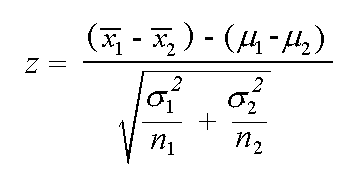

In [28]:
##Import necessary normal distribution function
from scipy.stats import norm

##Define function to perform the z-test
def ztest(xbar1,xbar2,sd1,sd2,n1,n2,confidence):
    
    ##Compute the z-value
    z = ((xbar1-xbar2)-0)/np.sqrt(sd1**2/n1+sd2**2/n2)
    
    ##Compute the p-value
    pVal = (1-norm.cdf(np.abs(z)))*2
    
    if pVal < confidence:
        return pVal,'reject'
    else:
        return pVal,'accept'
    
##Perform the z-test on all our features
significant, nonsignificant = [],[]
for i in featNames:
    
    ##Compute statistics necessary to perform Z-test
    winData,loseData = data.loc[data['win']==1,i],data.loc[data['win']==0,i]
    xbar_win,xbar_lose = np.mean(winData), np.mean(loseData)
    std_win,std_lose = np.std(winData),np.std(loseData)
    nWin,nLose = len(winData),len(loseData)
    
    ##Perform the Z-test
    test_pval, test_result = ztest(xbar_win,xbar_lose,std_win,std_lose,nWin,nLose,.075)
    
    ##Output results of the z-test
    if test_result == 'accept':
        print('Z-Test Result for '+i)
        print('---------------------')
        print('Accept the Null Hypothesis')
        print('P-Value: '+str(test_pval))
        print('\n')
        nonsignificant.append(i)
    else:
        print('Z-Test Result for '+i)
        print('---------------------')
        print('Reject the Null Hypothesis')
        print('P-Value: '+str(test_pval))
        print('\n')
        significant.append(i)
    

Z-Test Result for offDiff_rush_td_movAvg
---------------------
Reject the Null Hypothesis
P-Value: 0.0001792571154930478


Z-Test Result for defDiff_rush_td_movAvg
---------------------
Accept the Null Hypothesis
P-Value: 0.14908046872410075


Z-Test Result for offDiff_pass_td_movAvg
---------------------
Accept the Null Hypothesis
P-Value: 0.5893879504714223


Z-Test Result for defDiff_pass_td_movAvg
---------------------
Reject the Null Hypothesis
P-Value: 0.004556096324161096


Z-Test Result for offDiff_yp_rush_movAvg
---------------------
Reject the Null Hypothesis
P-Value: 0.0019300017862877716


Z-Test Result for defDiff_yp_rush_movAvg
---------------------
Accept the Null Hypothesis
P-Value: 0.7917788953902343


Z-Test Result for offDiff_pass_yards_movAvg
---------------------
Accept the Null Hypothesis
P-Value: 0.9429043158883987


Z-Test Result for defDiff_pass_yards_movAvg
---------------------
Reject the Null Hypothesis
P-Value: 0.0011048530941610846


Z-Test Result for offD

In [29]:
##Display number of significant/insigificant features
print('Number of Significant Features: '+str(len(significant)))
print('Number of Non-Significant Features: '+str(len(nonsignificant)))

Number of Significant Features: 19
Number of Non-Significant Features: 20


In [30]:
significant

['offDiff_rush_td_movAvg',
 'defDiff_pass_td_movAvg',
 'offDiff_yp_rush_movAvg',
 'defDiff_pass_yards_movAvg',
 'offDiff_total_yards_movAvg',
 'defDiff_total_yards_movAvg',
 'defDiff_turnovers_movAvg',
 'defDiff_interceptions_movAvg',
 'defDiff_firstDowns_movAvg',
 'defDiff_offensive_ppa_movAvg',
 'defDiff_offensive_successRate_movAvg',
 'offDiff_offensive_powerSuccess_movAvg',
 'offDiff_offensive_secondLevelYards_movAvg',
 'defDiff_completion_pct_movAvg',
 'offDiff_third_pct_movAvg',
 'defDiff_third_pct_movAvg',
 'gameDiff_gameControl_movAvg',
 'gameDiff_diff_points_movAvg',
 'gameDiff_elo_movAvg']

### Feature Collinearity Analysis